<a href="https://colab.research.google.com/github/SuryaBhaskar33/EXCELR_Data_Science/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ForestFires

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [5]:
ff=pd.read_csv("/content/forestfires.csv")
ff

FileNotFoundError: [Errno 2] No such file or directory: '/content/forestfires.csv'

In [ ]:
ff1=ff.drop(['month','day'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [ ]:
ff1['size_category']=lb.fit_transform(ff1['size_category'])

In [ ]:
ff2=ff1.values
ff2.shape

(517, 29)

In [ ]:
x=ff2[:,0:28]
y=ff2[:,-1]
x.shape

(517, 28)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
model.fit(x, y, validation_split=0.33,epochs=100, batch_size=5)

Epoch 1/100
70/70 [==============================] - 2s 6ms/step - loss: 3.8179 - accuracy: 0.5549 - val_loss: 1.0256 - val_accuracy: 0.6140
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.7225 - val_loss: 0.8394 - val_accuracy: 0.6550
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.7457 - val_loss: 0.7615 - val_accuracy: 0.5556
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.7514 - val_loss: 0.8054 - val_accuracy: 0.5497
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7717 - val_loss: 0.7176 - val_accuracy: 0.7368
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.8035 - val_loss: 0.7109 - val_accuracy: 0.6901
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.7977 - val_loss: 0.6436 - val_accuracy: 0.5848
Epoch 8/100
7

In [ ]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.0503 - accuracy: 0.9845
accuracy: 98.45%


#Gas Turbine

In [ ]:
gt=pd.read_csv("/content/gas_turbines.csv")

In [ ]:
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [ ]:
gt1=gt.values
gt1

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [ ]:
X=gt1[:,[0,1,2,3,4,5,6,8,9,10]]
Y=gt1[:,-4]
X

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[0.35890393, 0.40602285, 0.91801706, ..., 0.34107329, 0.03084967,
        0.48475958],
       [0.55162803, 0.59086189, 0.72785444, ..., 0.42819611, 0.02833486,
        0.43366477],
       [0.69430373, 0.53478712, 0.55215014, ..., 0.14847583, 0.15186537,
        0.33822331],
       ...,
       [0.29923532, 0.48494289, 0.94876603, ..., 0.77514199, 0.00101504,
        0.41400706],
       [0.64399376, 0.35825545, 0.50904718, ..., 0.04705791, 0.10100297,
        0.36756316],
       [0.3486443 , 0.24340602, 0.81637941, ..., 0.34416412, 0.00787964,
        0.54170062]])

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# add nodes for prediction
model.add(Dense(1))

In [ ]:
model.compile(optimizer='rmsprop',loss='mse')

In [ ]:
# Fit the model
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
353/353 [==============================] - 1s 2ms/step - loss: 14062.3945
Epoch 2/250
353/353 [==============================] - 1s 1ms/step - loss: 637.2443
Epoch 3/250
353/353 [==============================] - 1s 1ms/step - loss: 31.4683
Epoch 4/250
353/353 [==============================] - 1s 2ms/step - loss: 23.8486
Epoch 5/250
353/353 [==============================] - 0s 1ms/step - loss: 20.1519
Epoch 6/250
353/353 [==============================] - 0s 1ms/step - loss: 17.3306
Epoch 7/250
353/353 [==============================] - 1s 2ms/step - loss: 14.9618
Epoch 8/250
353/353 [==============================] - 1s 2ms/step - loss: 13.0121
Epoch 9/250
353/353 [==============================] - 0s 1ms/step - loss: 11.2753
Epoch 10/250
353/353 [==============================] - 0s 1ms/step - loss: 9.6423
Epoch 11/250
353/353 [==============================] - 0s 1ms/step - loss: 8.3536
Epoch 12/250
353/353 [==============================] - 0s 1ms/step - loss: 7.1488


<Axes: >

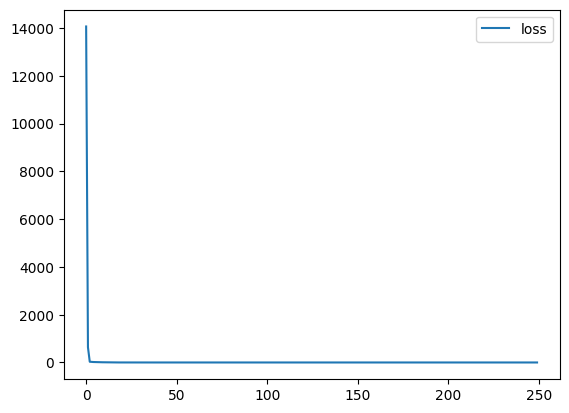

In [ ]:
%matplotlib inline
import matplotlib as plot
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
pred = model.predict(x_test)
pred

118/118 [==============================] - 0s 907us/step


array([[131.41222 ],
       [132.74893 ],
       [110.13762 ],
       ...,
       [159.19736 ],
       [103.647354],
       [131.77762 ]], dtype=float32)

In [ ]:
pred = pred.ravel()

In [ ]:
test_score = model.evaluate(x_test,y_test,verbose=0)
test_score


1.6864367723464966

In [ ]:
import matplotlib.pyplot as plt

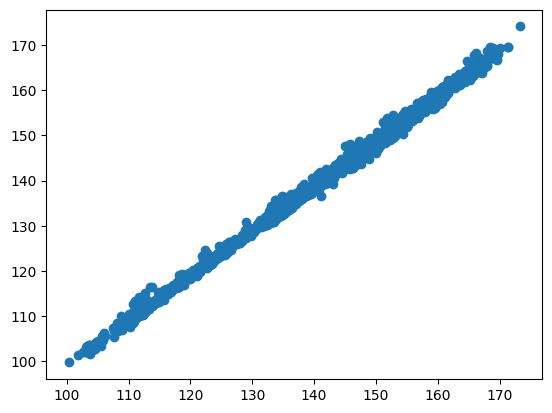

In [ ]:
plt.scatter(y_test,pred)
